Data shape: (569, 30)
Target shape: (569,)
Training set size: (455, 30), Target: (455,)
Testing set size: (114, 30), Target: (114,)
Model training complete.
Model Accuracy: 0.9386
Confusion Matrix:
[[32  6]
 [ 1 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.93      0.99      0.96        76

    accuracy                           0.94       114
   macro avg       0.95      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



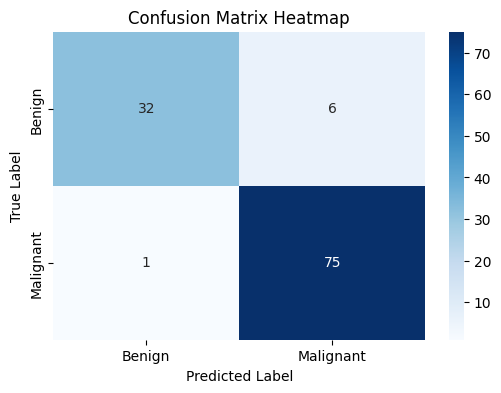

K-Fold Cross-Validation Mean Accuracy: 0.9385
GaussianNB: Mean Accuracy = 0.9385
KNeighborsClassifier: Mean Accuracy = 0.9279
LogisticRegression: Mean Accuracy = 0.9508
SVC: Mean Accuracy = 0.9192


In [10]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load the dataset
breast_cancer = load_breast_cancer()

# Check the shape of the data (samples and features)
print(f"Data shape: {breast_cancer.data.shape}")  # (samples, features)

# Check the shape of the target (labels)
print(f"Target shape: {breast_cancer.target.shape}")  # (samples,)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=11
)

# Confirm the training and testing set sizes
print(f"Training set size: {X_train.shape}, Target: {y_train.shape}")
print(f"Testing set size: {X_test.shape}, Target: {y_test.shape}")

#Create and Train the GaussianNB Model
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Model training complete.")

#Make Predictions
y_pred = nb.predict(X_test)

#Evaluate the Model - Accuracy Score
accuracy = nb.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.4f}")

#Generate Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#Generate Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

#Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

#K-Fold Cross-Validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
cv_scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

# Display mean accuracy across all folds
print(f"K-Fold Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")

#Running Multiple Models to Find the Best One
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    #'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

#Perform K-Fold Cross-Validation for each model
for name, model in estimators.items():
    scores = cross_val_score(estimator=model, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}")